![](https://1.bp.blogspot.com/-EKYS2teelzM/WgB-t2lzzqI/AAAAAAAAAgY/iWsXcbqbHsMy9dkQQFzepN4Z2jQXEf-AQCLcBGAs/s1600/z.jpg)

In [6]:
path = "D:\\TUANTA\\Python for Data Science Data\\"
import os
os.chdir(path)

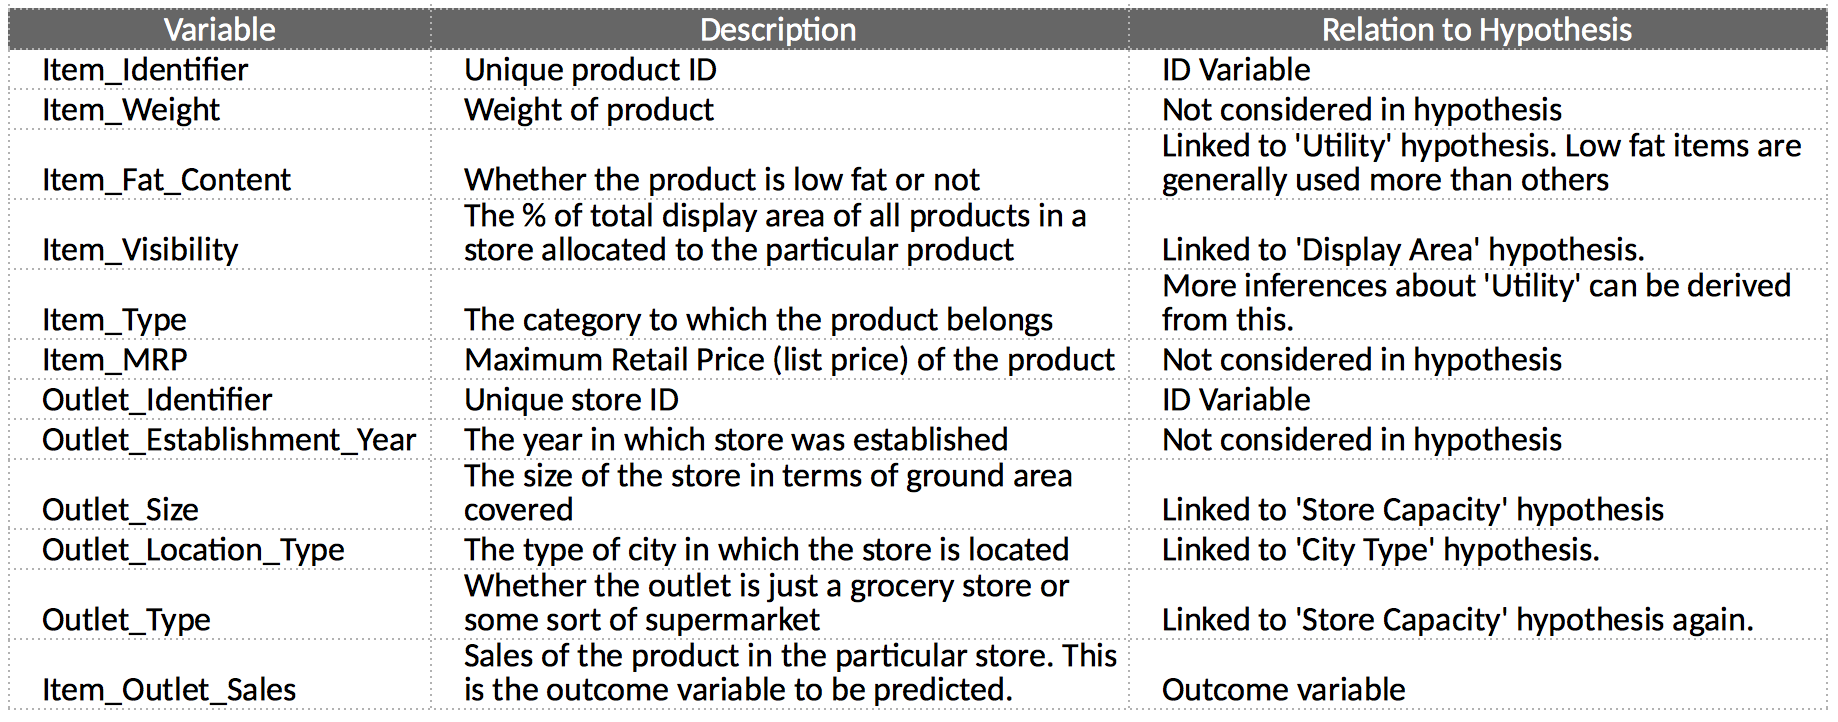

In [7]:
# 1. Hypothesis Generation
from IPython.display import display, Image
display(Image(filename= 'BigMartSales Prediction\\Description.png'))

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
train=pd.read_csv('BigMartSales Prediction\\Train.csv')
test=pd.read_csv('BigMartSales Prediction\\Test.csv')

# EDA

In [11]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [13]:
train.shape

(8523, 12)

train datset has 8523 rows and 12 columns

In [14]:
test.shape

(5681, 11)

test dataset has 5681 rows and 11 columns

In [15]:
#We will combine train and test data for better Analysis
train['source']='train'
test['source']='test'
test['Item_Outlet_Sales']=0.0

#Concatenating the data in df variable
df=pd.concat([train,test],sort=False,ignore_index=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


Our new dataset has 14204 rows and 13 columns

In [16]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

Item weight column has about 2439 missing values and outlet size column has 4016 NaN values

In [17]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

Datset has 8 rows with object type data out of which we have created one and one is an identifier column. others we will have to encode them

In [18]:
df.skew()

Item_Weight                  0.101309
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.544684
dtype: float64

There is skewness present in the item visibility which need to be handled

In [19]:
df.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

Item_Identifier, Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales are continuos type of data rest are categorical.

In [20]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


There are null values present in item weight as count less than total rows, mean is less than median in item mrp and outlet establishment year, rest of the features have median greater than median. Variance is almost zero in item visibility column and very high in item mrp. There are some outliers present as difference between min, max and interquartile range is unequal. Minimum value of visibility is zero that can not be posiible so we will treat it as a null value

### Univariate Analysis

In [21]:
#Lets separate categorical features first
cat=[feature for feature in df.columns if df[feature].nunique()<20 and feature!='source']
cat

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

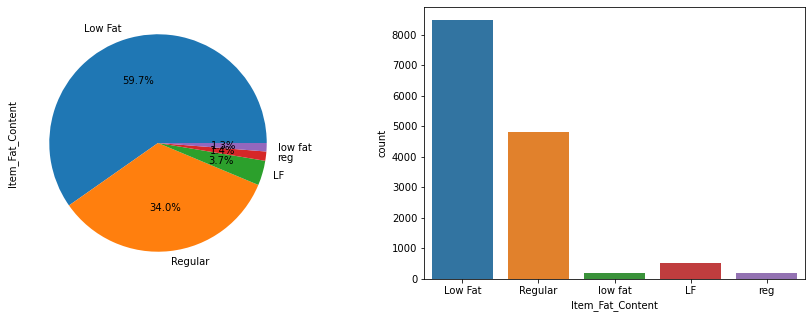

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Item_Fat_Content'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Item_Fat_Content'])
df['Item_Fat_Content'].value_counts()

Different low fat categories need to be merged. Same must be done with regular categories. Low Fat products are much more than Regular products.

OUT027    1559
OUT013    1553
OUT035    1550
OUT049    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

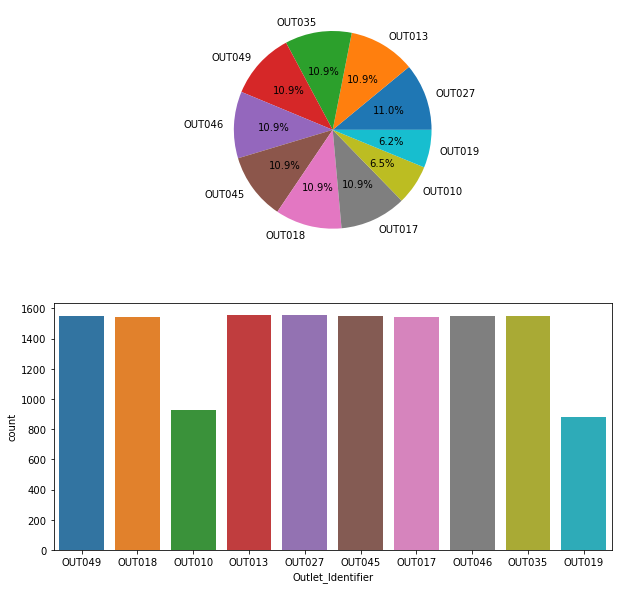

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
df['Outlet_Identifier'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(df['Outlet_Identifier'])
df['Outlet_Identifier'].value_counts()

There are 10 outlets which are almost balanced except for two outlets

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

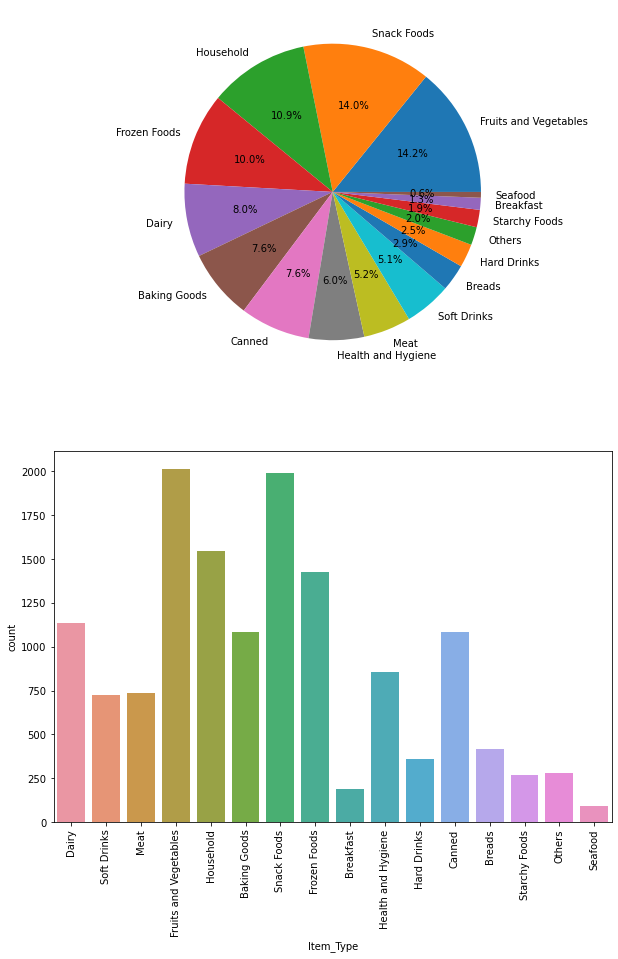

In [24]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
df['Item_Type'].value_counts().plot.pie(autopct='%1.1f%%',textprops={'fontsize':10})
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(df['Item_Type'])
plt.xticks(rotation = 90)
df['Item_Type'].value_counts()

Fruits and Vegetables and Snack Foods are the two categories in which most of the items fall whereas Seafood is the least

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

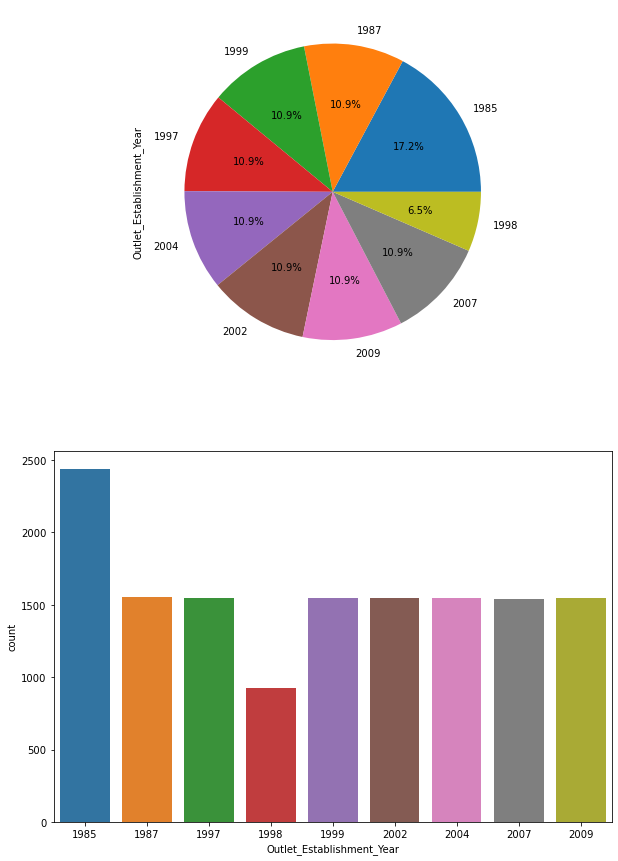

In [25]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
df['Outlet_Establishment_Year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(2,1,2)
sns.countplot(df['Outlet_Establishment_Year'])
df['Outlet_Establishment_Year'].value_counts()

Most outlets were opened in 1985 and least in 1998

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

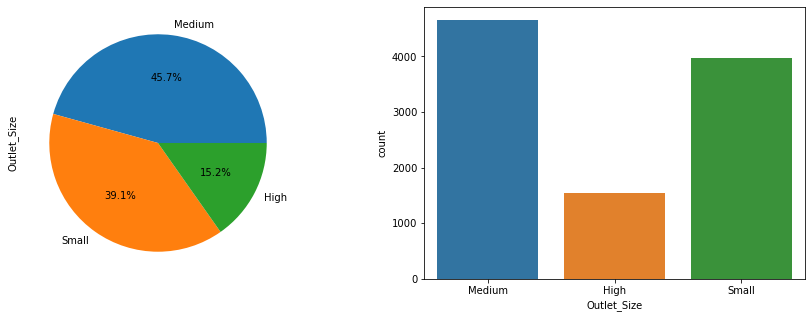

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Outlet_Size'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Outlet_Size'])
df['Outlet_Size'].value_counts()

There are few outlets with high size. most of the outlets are of medium size.

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

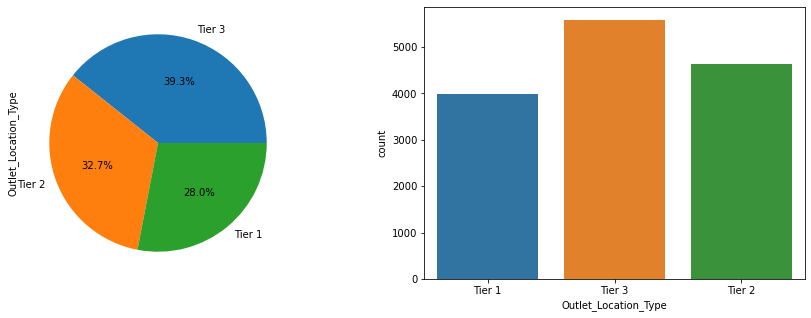

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Outlet_Location_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Outlet_Location_Type'])
df['Outlet_Location_Type'].value_counts()

Most of the stores are located in tier 2 cities/

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

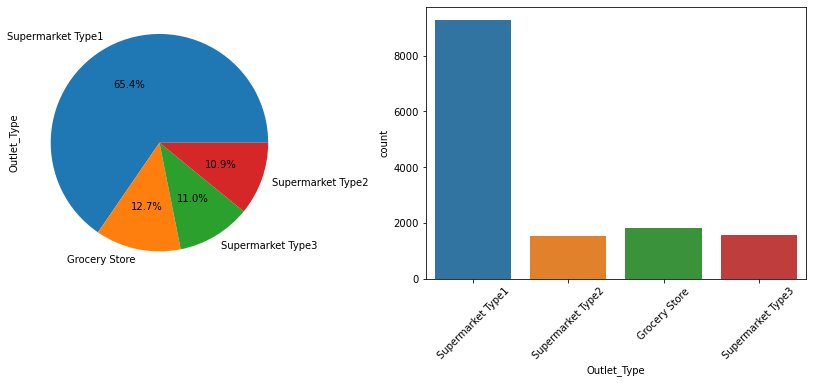

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Outlet_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Outlet_Type'])
plt.xticks(rotation=45)
df['Outlet_Type'].value_counts()

65% of the outlets are of supermarket type 1

In [29]:
#Separating the continuous feature
cont=[feature for feature in df.columns if df[feature].nunique()>20 and feature!='Item_Identifier' and feature!='Item_Outlet_Sales']
cont

['Item_Weight', 'Item_Visibility', 'Item_MRP']

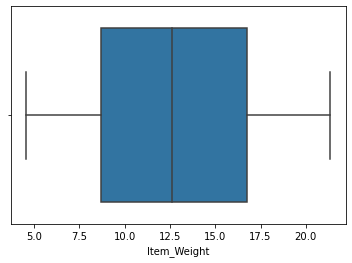

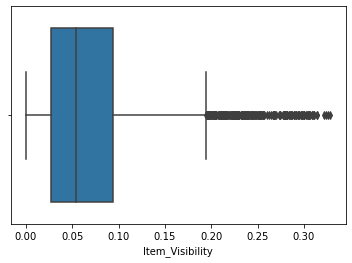

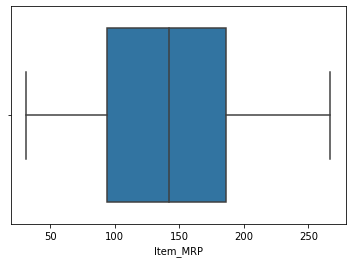

<Figure size 432x288 with 0 Axes>

In [30]:
for feat in cont:
    sns.boxplot(df[feat])
    plt.figure()

Only Item Visibility has large no. of outliers

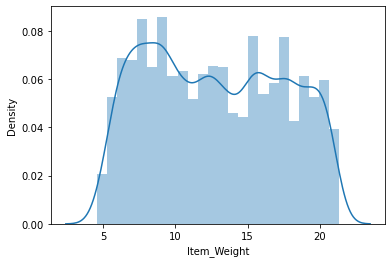

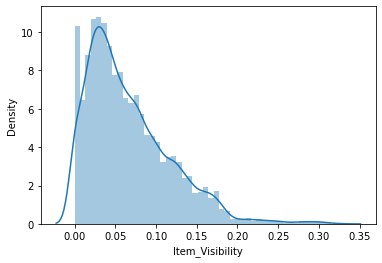

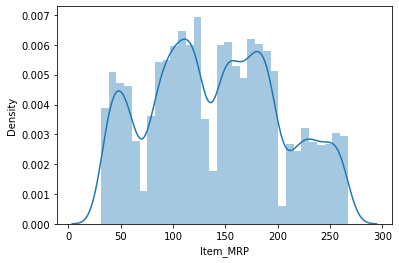

<Figure size 432x288 with 0 Axes>

In [31]:
for feat in cont:
    sns.distplot(df[feat])
    plt.figure()

Only Item visibility is skewed to the right while others almost follow the gaussian distribution.

### Bivariate Analysis

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Outlet_Type'>

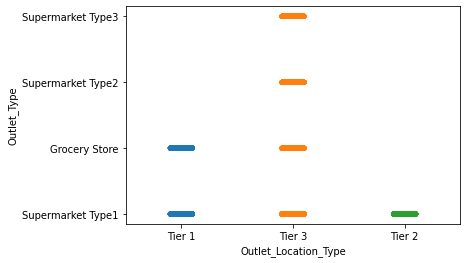

In [32]:
sns.stripplot(df['Outlet_Location_Type'],df['Outlet_Type'])

Tier 3 cities have only Superkarket type 1 whereas Tier 1 cities have only supermarket 1 and grocery strores

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Type'>

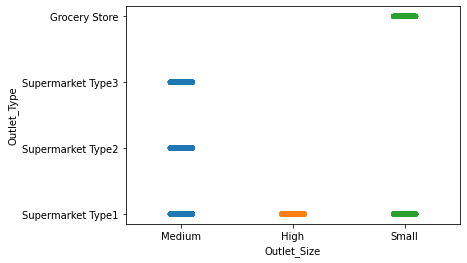

In [33]:
sns.stripplot(df['Outlet_Size'],df['Outlet_Type'])

Supermarket type 1 are of all sizes whereas grocery stores are only small and Supermarket type 2, Supermarket type 3 are of medium size only.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Location_Type'>

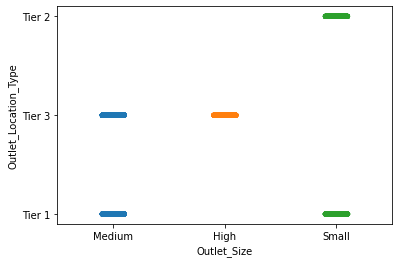

In [34]:
sns.stripplot(df['Outlet_Size'],df['Outlet_Location_Type'])

Tier 2 citis have only small outlet size and high outlet size is only found in tier 3 cities

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Outlet_Type'>

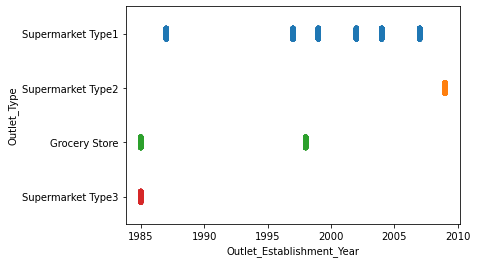

In [35]:
sns.stripplot(df['Outlet_Establishment_Year'],df['Outlet_Type'])

Supermarket type 2 was build much later while grocery stores and supermarket are the oldest outlet type.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Outlet_Location_Type'>

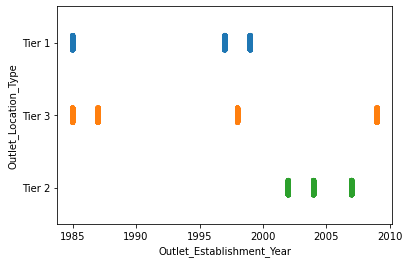

In [36]:
sns.stripplot(df['Outlet_Establishment_Year'],df['Outlet_Location_Type'])

In Tier1 and tier2 cities outlets were established in 1985 whereas tier2 got outlets after 2000

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Outlet_Size'>

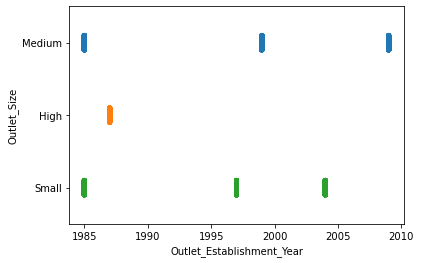

In [37]:
sns.stripplot(df['Outlet_Establishment_Year'],df['Outlet_Size'])

After 1990 no outlet of high size was established.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Type'>

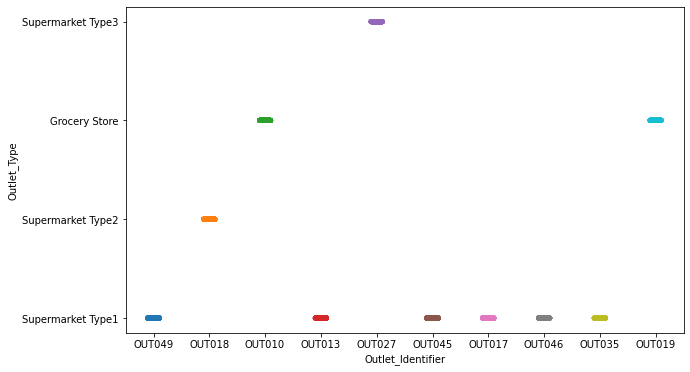

In [38]:
plt.figure(figsize=(10,6))
sns.stripplot(df['Outlet_Identifier'],df['Outlet_Type'])

There is only one oulat identifier for supermarket 2 and 3 while most of the outlet identifiers belong to supermarket1

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Location_Type'>

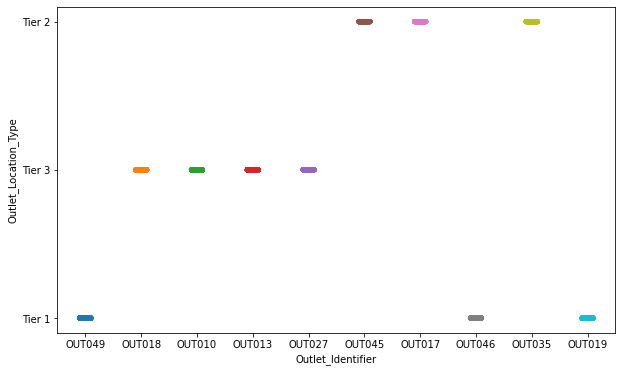

In [39]:
plt.figure(figsize=(10,6))
sns.stripplot(df['Outlet_Identifier'],df['Outlet_Location_Type'])

Tier 3 has the most diff types of outlets, but they are almost balanced.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Identifier'>

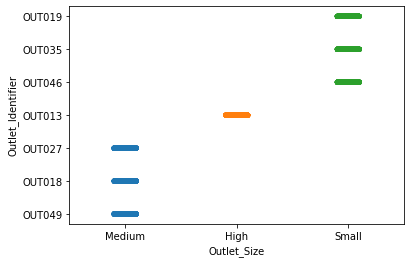

In [40]:
sns.stripplot(df['Outlet_Size'],df['Outlet_Identifier'])

There is only Outlet13 with high outlet size while medium and small of outlets each have 3 outlet identifiers. 

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Establishment_Year'>

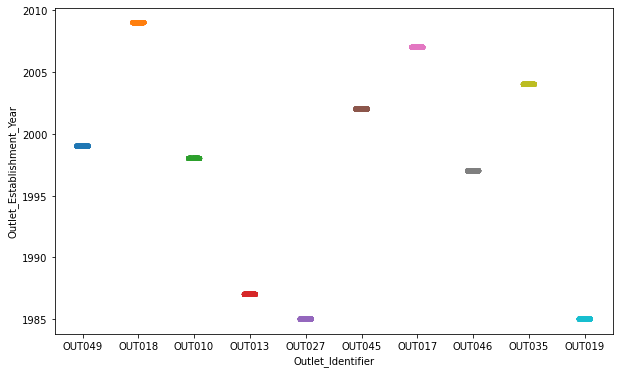

In [41]:
plt.figure(figsize=(10,6))
sns.stripplot(df['Outlet_Identifier'],df['Outlet_Establishment_Year'])

Outlet 27 and 19 are the oldest outlet identifier and outlet 18  is the newest, outlet no. does not hold any order towards year of establishment. 

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Visibility'>

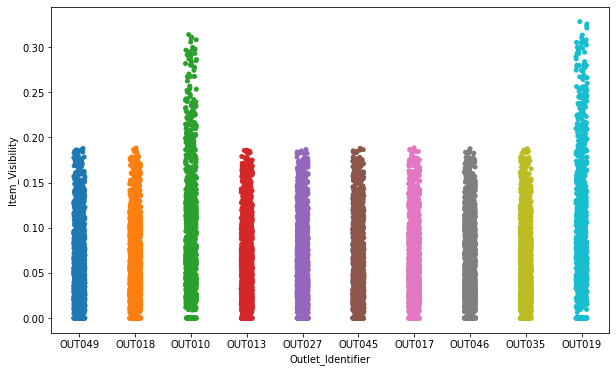

In [42]:
plt.figure(figsize=(10,6))
sns.stripplot(df['Outlet_Identifier'],df['Item_Visibility'])

Outlet 10 and 19 have give the highest visibilty to products. Other outlets provide almost equal visibility.

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Visibility'>

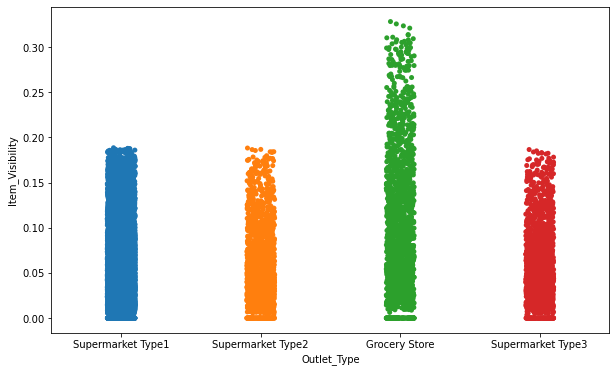

In [43]:
plt.figure(figsize=(10,6))
sns.stripplot(df['Outlet_Type'],df['Item_Visibility'])

Products are most visible in grocery stores rather than any other super markets

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Visibility'>

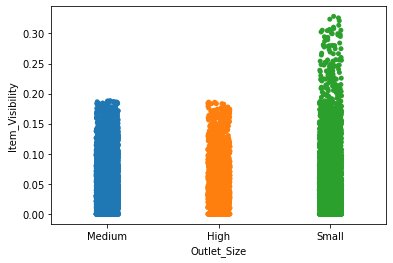

In [44]:
sns.stripplot(df['Outlet_Size'],df['Item_Visibility'])

Smallest Stores provide the most visibility to products

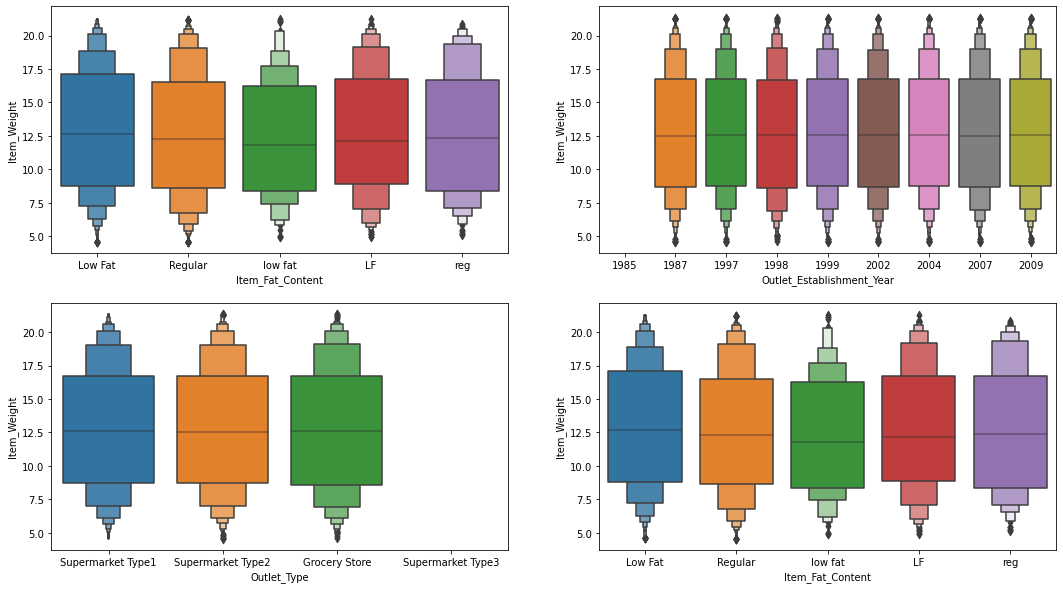

In [45]:
fig,ax=plt.subplots(2,2,figsize=(18,10))
r=0
c=0
for i,n in enumerate(['Item_Fat_Content','Outlet_Establishment_Year','Outlet_Type','Item_Fat_Content']):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxenplot(x=df[n],y=df['Item_Weight'],ax=ax[r,c])
    c+=1

Data of weight is missing for Supermarket 3 and for the year 1985, Median of low fat content is lowest.

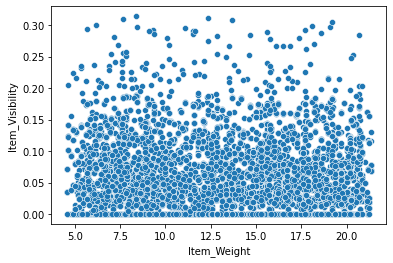

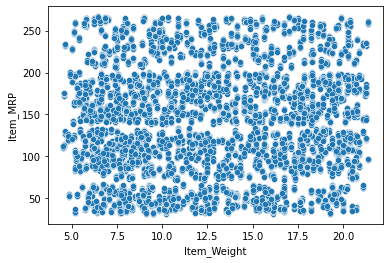

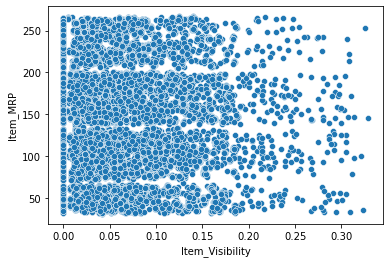

<Figure size 432x288 with 0 Axes>

In [46]:
for i in range(len(cont)):
    for j in range(i+1,len(cont)):
        sns.scatterplot(x=cont[i],y=cont[j],data=df)
        plt.figure()

There are less products with high visibility. There seem to exist no correlation between the above continuous features

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

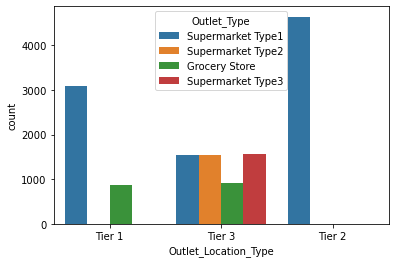

In [47]:
sns.countplot(df['Outlet_Location_Type'],hue=df['Outlet_Type'])

Tier 2 cities have the highest no. of supermarket 2 and donot habe any other type of outlet whereas tier 3 cities have all the types of outlets with less no. of each of them.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

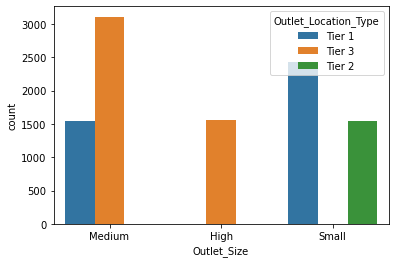

In [48]:
sns.countplot(df['Outlet_Size'],hue=df['Outlet_Location_Type'])

Tier 3 cities have the highest no. of medioum size outlet and tier 1 cities have highest no. small size outlets.Tier 3 cities have the least no. of stores

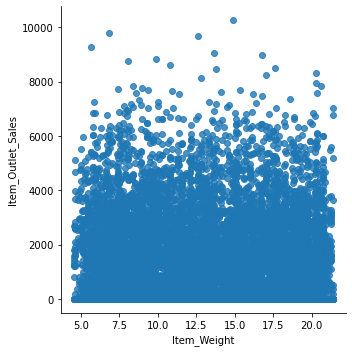

In [49]:
sns.lmplot(x='Item_Weight',y='Item_Outlet_Sales',data=df)

There is no relation between item weight and item outlet sales.

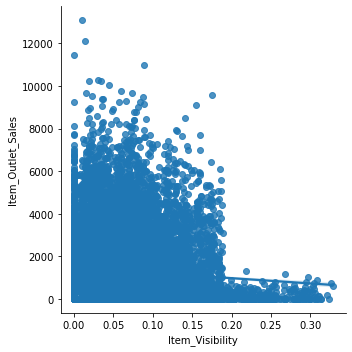

In [50]:
sns.lmplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)

Ttem outlet sales sharply decreases for the most visible items

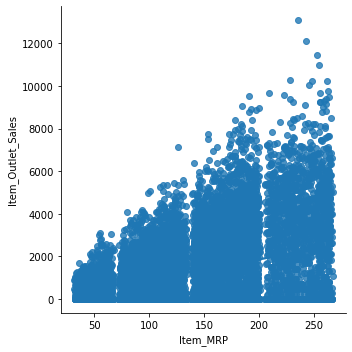

In [51]:
sns.lmplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)

As the mrp of an item increases item outlet sales also increases

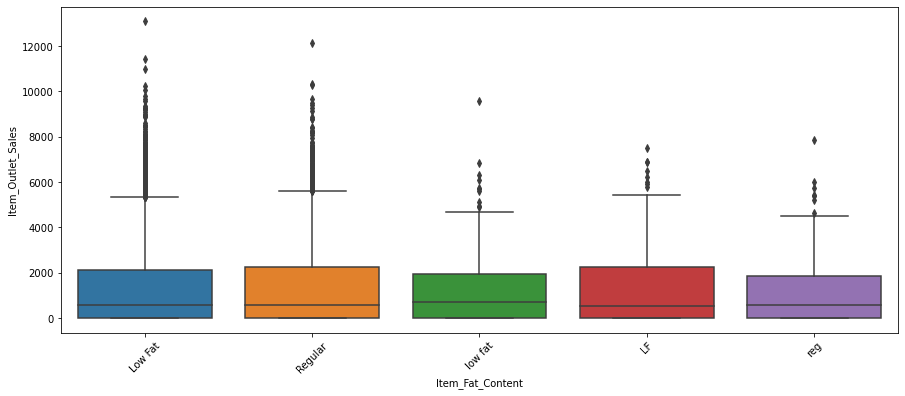

<Figure size 432x288 with 0 Axes>

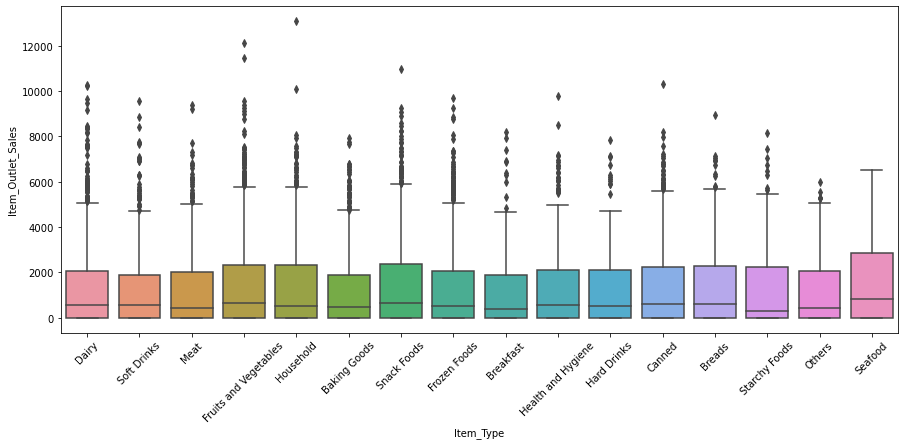

<Figure size 432x288 with 0 Axes>

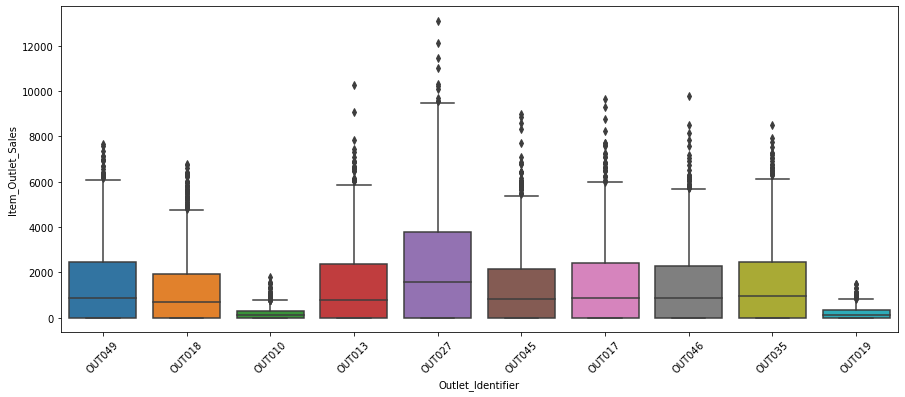

<Figure size 432x288 with 0 Axes>

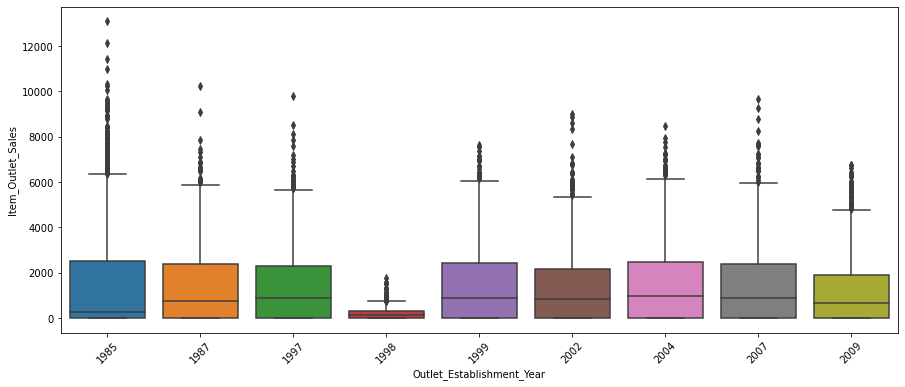

<Figure size 432x288 with 0 Axes>

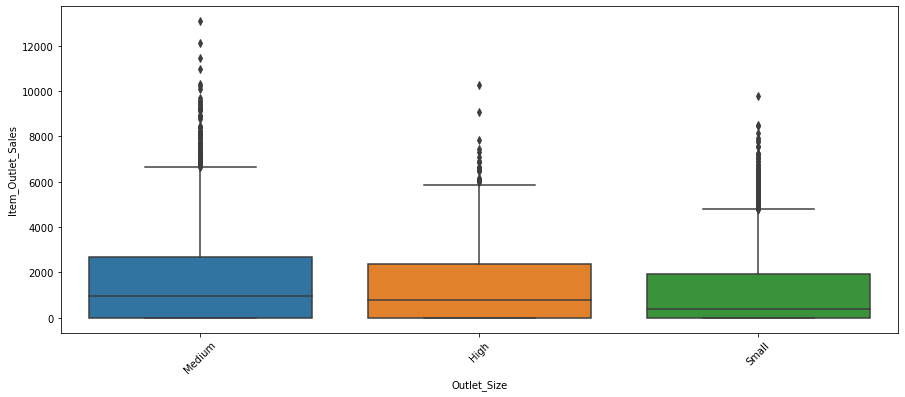

<Figure size 432x288 with 0 Axes>

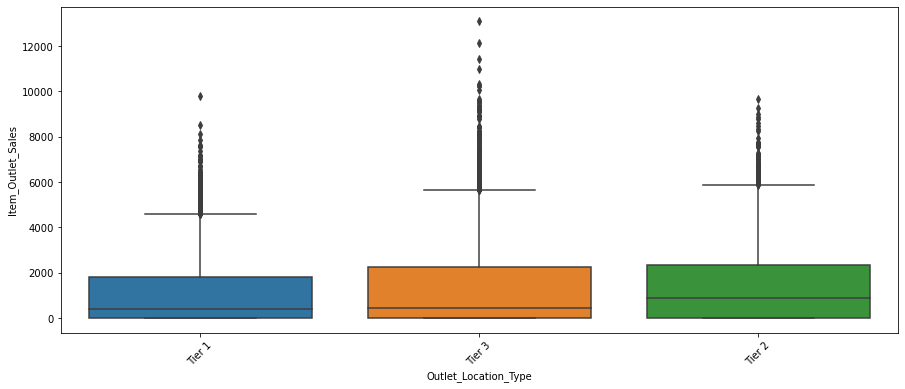

<Figure size 432x288 with 0 Axes>

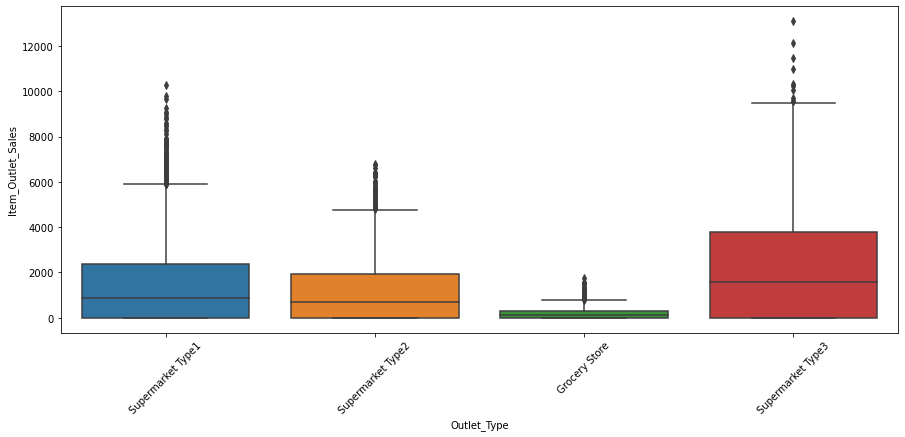

<Figure size 432x288 with 0 Axes>

In [52]:
for i in cat:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=df[i],y=df['Item_Outlet_Sales'])
    plt.xticks(rotation=45)
    plt.figure()

There is not much relation between fat content and item outlet sales. Seafoord, Vegetables and fruits contribute towards the item outlet sales. Medium size outlets and Supermarket 3 gives the most item outlet sales. Tier 1 cities donot produce least` item outlet sales compared to other types of cities.

### Multivariate Analysis

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

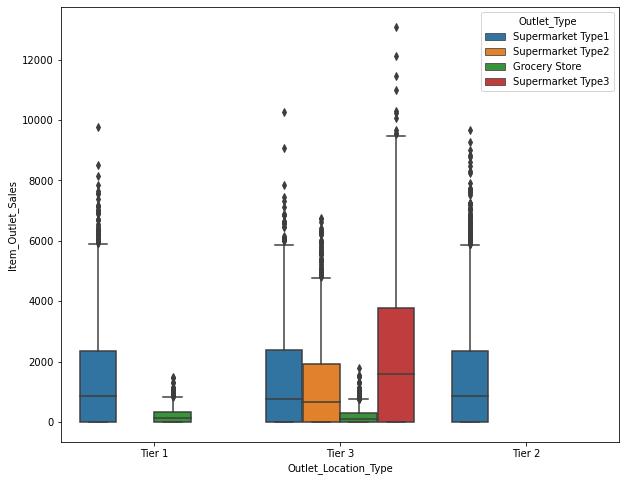

In [53]:
plt.figure(figsize=(10,8))
sns.boxplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=df)

Tier 3 ;ocations have the most sales. It can also be seen that they have most type of outlets, hence more sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

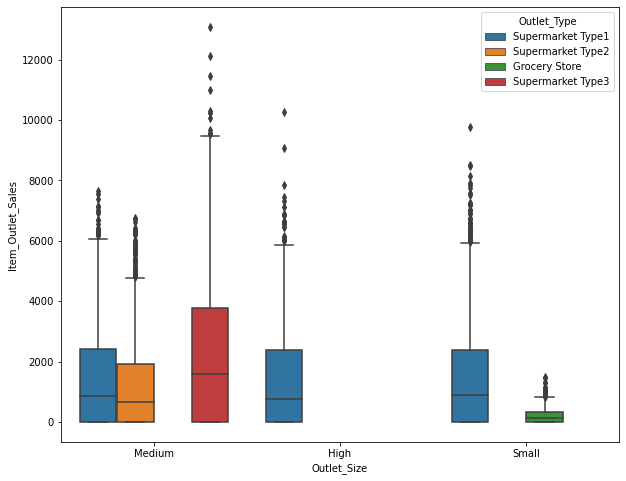

In [54]:
plt.figure(figsize=(10,8))
sns.boxplot('Outlet_Size','Item_Outlet_Sales',hue='Outlet_Type',data=df)

It can be seen that medium size outlets sell the most and also they have the most type of ooutlets hence the sales increases even more

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_MRP'>

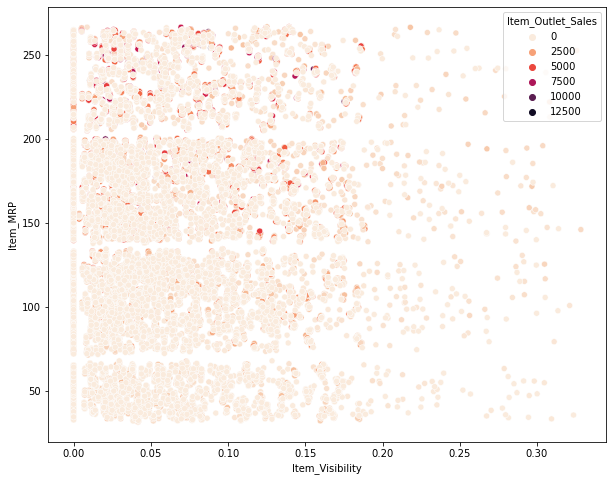

In [55]:
plt.figure(figsize=(10,8))
sns.scatterplot('Item_Visibility','Item_MRP',hue='Item_Outlet_Sales',data=df,palette='rocket_r')

Item_Outlet_Sales increases with low item visibility and high item price.

<AxesSubplot:>

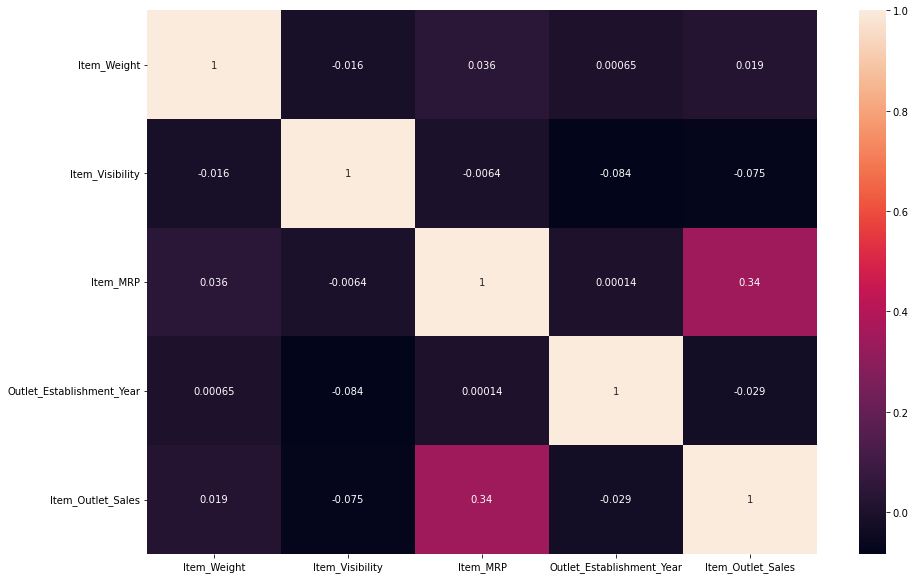

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

MRP has the strongest positive correlation with Sales, while cisibility and establishment show a little negative correlation. There is not much correlation between the independent features.

# Feature Engineering

##### Handling nan values 

###### Item_Visibility

In [57]:
df['Item_Visibility'].value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

As seen earlier visibilty has 0 values which is not possible as a product will have some visibility in marts

In [58]:
#Replacing o visibility with nan values
df['Item_Visibility'].replace(0,np.nan,inplace=True)
df['Item_Visibility'].min()

0.003574698

(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

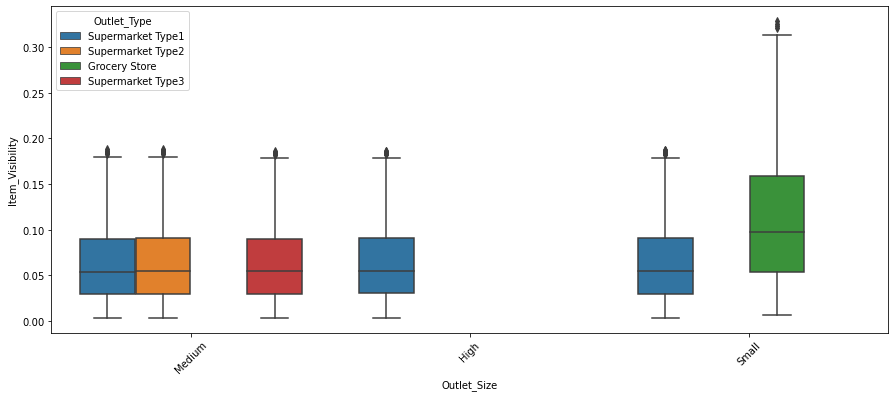

In [59]:
#Checking visibility in Outlet size with Outlet type
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='Outlet_Size', y='Item_Visibility', hue='Outlet_Type')
plt.xticks(rotation=45)

Here visibility contains missing values

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

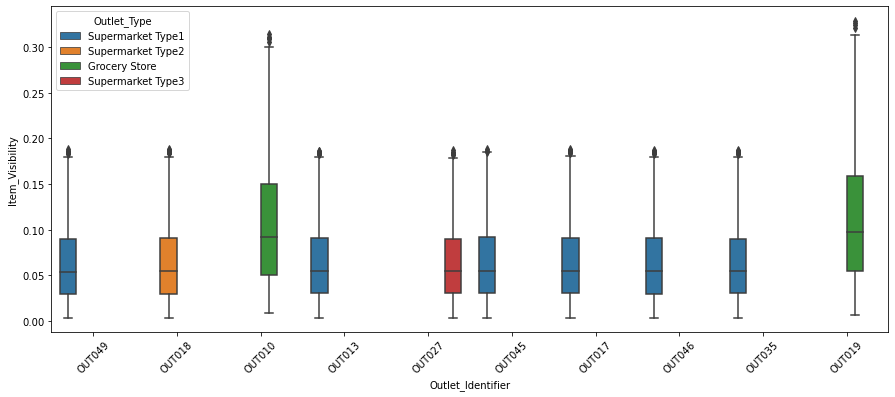

In [60]:
#Checking visibility in Outlet identifier with Outlet type
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='Outlet_Identifier', y='Item_Visibility', hue='Outlet_Type')
plt.xticks(rotation=45)

This also contain missing values 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

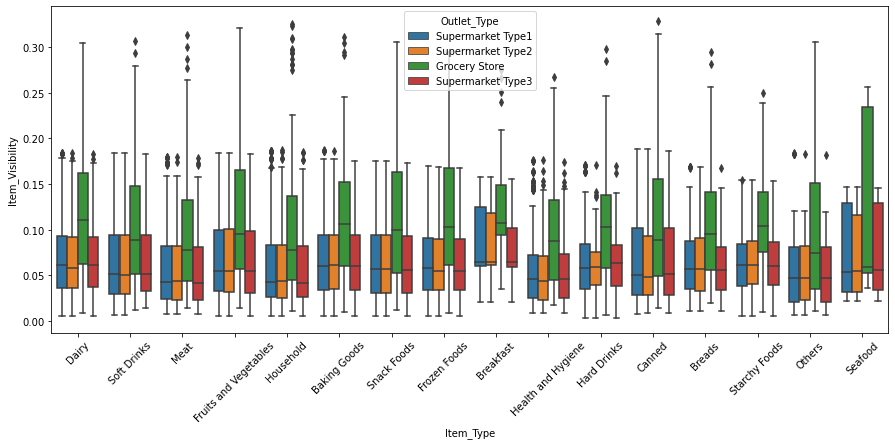

In [61]:
#Checking visibility in Item type with Outlet type
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='Item_Type', y='Item_Visibility', hue='Outlet_Type')
plt.xticks(rotation=45)

Here thee are no missing values for missing visibility hence this can be used to fill nan values in visibility column

In [62]:
#Creating pivot table to help fill nan values of visibility from here
table = df.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.116306,0.066692,0.068206,0.066524
Breads,0.111612,0.067579,0.067976,0.066038
Breakfast,0.126056,0.079993,0.083079,0.078609
Canned,0.112484,0.066167,0.064655,0.067549
Dairy,0.120742,0.069299,0.069000,0.069213
Frozen Foods,0.115895,0.065449,0.064184,0.064816
Fruits and Vegetables,0.114820,0.067123,0.067503,0.066758
Hard Drinks,0.109913,0.064873,0.063611,0.065297
Health and Hygiene,0.098924,0.055021,0.053081,0.054924


In [63]:
# replace the nan values
# define function that returns the mean values
def find_mean(x):
    return table.loc[x['Item_Type'], x['Outlet_Type']]

# replace missing values in visibility with mean values from above pivot table
df['Item_Visibility'].fillna(df[df['Item_Visibility'].isnull()].apply(find_mean, axis=1), inplace=True)

###### Item_Weight

In [64]:
#we try to fill the nan values of wieht by using values from item identifier
wt_table = df.pivot_table(values='Item_Weight', index='Item_Identifier')
wt_table

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [65]:
def find_wt(x):
    return wt_table.loc[x['Item_Identifier'],'Item_Weight']

df['Item_Weight'].fillna(df[df['Item_Weight'].isnull()].apply(find_wt, axis=1), inplace=True)

###### Outlet_Size

In [66]:
df['Outlet_Size'].replace(np.NaN,'Unknown',inplace=True)

In [67]:
from scipy.stats import mode

In [68]:
size_table = df.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
size_table

,Outlet_Size
Outlet_Type,
Grocery Store,Unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


Grocery stores are usually smaller than super markets so we will replace NaN values by small

In [69]:
#Filling nan values with mode
df['Outlet_Size'].replace('Unknown','Small',inplace=True)

<AxesSubplot:>

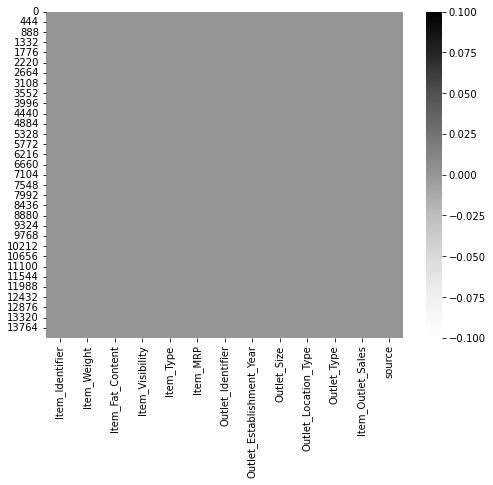

In [70]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cmap='Greys')

No null values remain

##### Engineering

###### Item_Identifier

In [71]:
df['Item_Identifier']=df['Item_Identifier'].apply(lambda x: x[:-2])

In [72]:
df['Item_Identifier'].unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

Now the item identifier column looks more meaningful so we will keep it.

###### Correcting year column by subtracting it from 2021

In [73]:
df['Outlet_Establishment_Year']=(2021.0-df['Outlet_Establishment_Year'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,22.0,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,12.0,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,22.0,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX,19.20,Regular,0.114820,Fruits and Vegetables,182.0950,OUT010,23.0,Small,Tier 3,Grocery Store,732.3800,train
4,NCD,8.93,Low Fat,0.057774,Household,53.8614,OUT013,34.0,High,Tier 3,Supermarket Type1,994.7052,train


###### Merging all the low fat categories to Low fat and regular categories to Regular

In [74]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [75]:
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)
df['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace=True)
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

Now we have only two categories in the fat content column

##### Encoding object type features

In [76]:
#Using Ordinal Encoder for encoding object type values
from sklearn.preprocessing import OrdinalEncoder
e=OrdinalEncoder()

In [77]:
obj=[feature for feature in df.columns if df[feature].dtypes=='O' and feature!='source']
obj

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [78]:
for i in obj:
    df[i]=e.fit_transform(df[i].values.reshape(-1,1))

In [79]:
df.dtypes

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year    float64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
source                        object
dtype: object

All columns are converted into float type except for source.

##### Removing outliers from Visibiltiy column

In [80]:
df=df[np.abs(df.Item_Visibility-df.Item_Visibility.mean())<=(3*df.Item_Visibility.std())]

In [81]:
df.shape

(14023, 13)

<AxesSubplot:xlabel='Item_Visibility'>

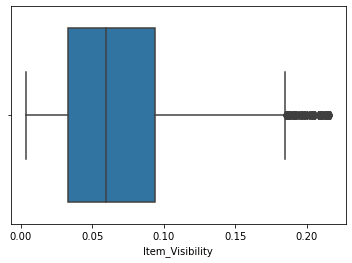

In [82]:
sns.boxplot(df['Item_Visibility'])

##### Removing skewness from visibility column

In [83]:
df['Item_Visibility'].skew()

0.8492005168606449

In [84]:
df['Item_Visibility']=np.sqrt(df['Item_Visibility'])

In [85]:
df['Item_Visibility'].skew()

0.21330304743134373

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

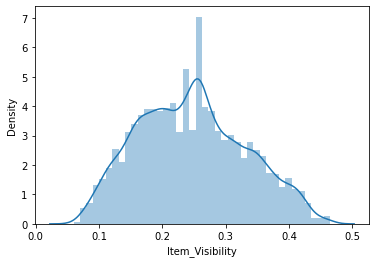

In [86]:
sns.distplot(df['Item_Visibility'])

Outliers and skewness both are removed from the visibility column

##### Scaling the data

In [87]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()

In [88]:
df.iloc[:,:-2]=m.fit_transform(df.iloc[:,:-2])

##### Separating the data into train and test

In [89]:
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']

In [90]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Item_Outlet_Sales'],axis=1,inplace=True)

In [91]:
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [92]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.271429,0.282525,0.0,0.164962,0.266667,0.927507,1.000000,0.416667,0.5,0.0,0.333333,3735.1380
1,0.028571,0.081274,1.0,0.194970,0.933333,0.072068,0.333333,0.000000,0.5,1.0,0.666667,443.4228
2,0.457143,0.770765,0.0,0.171824,0.666667,0.468288,1.000000,0.416667,0.5,0.0,0.333333,2097.2700
3,0.600000,0.871986,1.0,0.688223,0.400000,0.640093,0.000000,0.458333,1.0,1.0,0.000000,732.3800
4,0.685714,0.260494,0.0,0.445327,0.600000,0.095805,0.111111,0.916667,0.0,1.0,0.333333,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,0.342857,0.137541,0.0,0.440225,0.866667,0.777729,0.111111,0.916667,0.0,1.0,0.333333,2778.3834
8421,0.528571,0.227746,1.0,0.387107,0.000000,0.326263,0.777778,0.291667,1.0,0.5,0.333333,549.2850
8422,0.771429,0.359929,0.0,0.315158,0.533333,0.228492,0.666667,0.208333,1.0,0.5,0.333333,1193.1136
8423,0.457143,0.158083,1.0,0.792362,0.866667,0.304939,0.333333,0.000000,0.5,1.0,0.666667,1845.5976


In [93]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.585714,0.964275,0.0,0.067049,0.866667,0.325012,1.000000,0.416667,0.5,0.0,0.333333
1,0.585714,0.222983,1.0,0.335997,0.266667,0.237819,0.222222,0.083333,1.0,0.5,0.333333
2,0.828571,0.598095,0.0,0.630769,0.733333,0.893316,0.000000,0.458333,1.0,1.0,0.000000
3,0.500000,0.164335,0.0,0.158480,0.866667,0.525233,0.222222,0.083333,1.0,0.5,0.333333
4,0.614286,0.538553,1.0,0.701863,0.266667,0.861381,0.555556,1.000000,0.5,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
5593,0.285714,0.353974,1.0,0.139058,0.866667,0.467004,0.888889,0.500000,1.0,0.0,0.333333
5594,0.314286,0.181304,1.0,0.785119,1.000000,0.585126,0.333333,0.000000,0.5,1.0,0.666667
5595,0.842857,0.324204,0.0,0.521286,0.533333,0.371199,0.777778,0.291667,1.0,0.5,0.333333
5596,0.400000,0.639774,1.0,0.486929,0.200000,0.778154,0.222222,0.083333,1.0,0.5,0.333333


# Modelling Phase

Importing neccessary modules

In [94]:
from sklearn.model_selection import train_test_split,cross_val_score

In [95]:
#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [96]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [97]:
x=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [98]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=0
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.2,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        r2=r2_score(p,ytest)
        if maxx<r2:
            maxx=r2
            j=state
    return j

In [99]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),LinearRegression(),Lasso(),Ridge(),ElasticNet(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

names=['KNeighborsRegressor','LinearRegression','Lasso','Ridge','ElasticNet','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']

In [100]:
def performance(p,ytest,s,n):
    print(m)
    print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
    print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
    print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
    print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
    print('Mean of cross validaton Score is',np.round(np.mean(s),4))
    print('--------------------------------------------------------------------------')

In [101]:
def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.2,random_state=randomstate(x,y))
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=10)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),4)*100)
        mcv.append(np.round(np.mean(score),4)*100)
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    data.set_index('Model',inplace = True)
    return data
        

In [102]:
createmodels(models,x,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,809.6622,1.301844e+06,1140.9836,26.14,50.28
LinearRegression,886.4671,1.370332e+06,1170.6120,13.49,49.79
Lasso,885.4656,1.368904e+06,1170.0017,12.70,49.82
Ridge,886.2023,1.369934e+06,1170.4417,13.16,49.79
ElasticNet,1212.1723,2.344823e+06,1531.2815,-7167.95,12.60
DecisionTreeRegressor,1099.7594,2.518209e+06,1586.8865,20.70,16.26
RandomForestRegressor,779.8128,1.238802e+06,1113.0150,35.70,54.70
AdaBoostRegressor,1054.1472,1.693790e+06,1301.4571,-27.04,45.14
GradientBoostingRegressor,742.6823,1.119748e+06,1058.1814,37.77,58.73


From above analysis only Random Forest, Gradient Boost and xgboost perform well with r2 scor more than 51 and mean absolute error less than 810.Though the results are not as good therefore we further try to increase the scores by Feature Selection

# Feature selection

##### Using ANOVA test

In [103]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [104]:
selection = SelectKBest(score_func=f_classif)
fit = selection.fit(x,y)

In [105]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
featureScores

,Features,Score
0,Item_Identifier,1.129296
1,Item_Weight,1.135301
2,Item_Fat_Content,1.164510
3,Item_Visibility,1.167628
4,Item_Type,1.195552
5,Item_MRP,3.497038
6,Outlet_Identifier,1.190374
7,Outlet_Establishment_Year,1.213252
8,Outlet_Size,1.059711
9,Outlet_Location_Type,1.037075


In [106]:
featureScores.sort_values(by=['Score'],ascending=False)

,Features,Score
5,Item_MRP,3.497038
10,Outlet_Type,2.105619
7,Outlet_Establishment_Year,1.213252
4,Item_Type,1.195552
6,Outlet_Identifier,1.190374
3,Item_Visibility,1.167628
2,Item_Fat_Content,1.164510
1,Item_Weight,1.135301
0,Item_Identifier,1.129296
8,Outlet_Size,1.059711


Above are the best features with there score in decreasing order after going through anova test

##### Using feature importances of Extra trees regressor

In [107]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

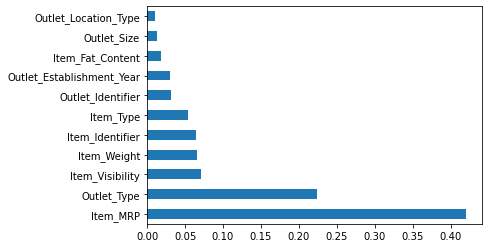

In [108]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

MRP, Outlet weight are the most important features and the list follows

In [109]:
fi=list(feat_importances.nlargest(11).index)
fi

['Item_MRP',
 'Outlet_Type',
 'Item_Visibility',
 'Item_Weight',
 'Item_Identifier',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Item_Fat_Content',
 'Outlet_Size',
 'Outlet_Location_Type']

Above fi list contains features in order with most important feature on the top and least important feature below.

##### Using Lasso Coeficients

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,y)
print(m1.best_params_)

{'alpha': 1}


In [112]:
m1=Lasso(alpha=1)
m1.fit(x,y)


Lasso(alpha=1)

In [113]:
importance = np.abs(m1.coef_)

In [114]:
dfcolumns = pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

,Features,Coefficients
0,Item_Identifier,1.390688
1,Item_Weight,0.398274
2,Item_Fat_Content,54.623804
3,Item_Visibility,260.407711
4,Item_Type,0.000000
5,Item_MRP,3689.411377
6,Outlet_Identifier,482.277225
7,Outlet_Establishment_Year,7.023098
8,Outlet_Size,248.076053
9,Outlet_Location_Type,231.696856


In [115]:
featureScores.sort_values(by=['Coefficients'],ascending=False)

,Features,Coefficients
5,Item_MRP,3689.411377
10,Outlet_Type,2483.451777
6,Outlet_Identifier,482.277225
3,Item_Visibility,260.407711
8,Outlet_Size,248.076053
9,Outlet_Location_Type,231.696856
2,Item_Fat_Content,54.623804
7,Outlet_Establishment_Year,7.023098
0,Item_Identifier,1.390688
1,Item_Weight,0.398274


Above dataframe shows features with their coefficients values. Item Type has coefficient 0 signifying that it is least important feature according to Lasso

##### Conclusion

Anova test and feature importances tell us that Outlet_Location_Type is the least significant feature.

Feature sekection tells us that Item_Type is the least significant feature

In [116]:
x1=x.drop('Outlet_Location_Type',axis=1)
x2=x.drop('Item_Type',axis=1)
x3=x.drop(['Outlet_Location_Type','Item_Type'],axis=1)

In [117]:
#Testing x1 dataset
createmodels(models,x1,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,808.3956,1.301318e+06,1140.7533,26.37,50.36
LinearRegression,887.1898,1.373900e+06,1172.1349,13.30,49.72
Lasso,886.1188,1.372222e+06,1171.4188,12.52,49.75
Ridge,886.8998,1.373430e+06,1171.9341,12.97,49.72
ElasticNet,1213.0091,2.350025e+06,1532.9791,-7719.87,12.42
DecisionTreeRegressor,1097.2506,2.494842e+06,1579.5069,21.83,16.30
RandomForestRegressor,786.3554,1.250679e+06,1118.3376,34.87,54.56
AdaBoostRegressor,1062.0417,1.710772e+06,1307.9648,-34.55,45.74
GradientBoostingRegressor,743.1330,1.121321e+06,1058.9244,37.68,58.69


In [118]:
#Testing x2 dataset
createmodels(models,x2,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,805.9558,1.279370e+06,1131.0922,29.60,50.65
LinearRegression,886.4391,1.370323e+06,1170.6080,13.49,49.80
Lasso,885.4656,1.368904e+06,1170.0017,12.70,49.82
Ridge,886.1800,1.369925e+06,1170.4378,13.16,49.80
ElasticNet,1212.2526,2.344983e+06,1531.3338,-7172.75,12.60
DecisionTreeRegressor,1098.0626,2.489741e+06,1577.8914,22.12,13.63
RandomForestRegressor,776.6193,1.224813e+06,1106.7126,36.57,54.80
AdaBoostRegressor,1071.4682,1.721322e+06,1311.9916,-29.10,43.20
GradientBoostingRegressor,742.7568,1.123242e+06,1059.8309,37.38,58.79


In [119]:
#Testing x3 dataset
createmodels(models,x3,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,805.1753,1.275904e+06,1129.5593,30.07,50.76
LinearRegression,887.1800,1.373886e+06,1172.1289,13.30,49.74
Lasso,886.1188,1.372222e+06,1171.4188,12.52,49.76
Ridge,886.8925,1.373416e+06,1171.9284,12.97,49.74
ElasticNet,1213.0930,2.350185e+06,1533.0314,-7726.04,12.42
DecisionTreeRegressor,1087.4284,2.421624e+06,1556.1569,22.15,14.93
RandomForestRegressor,780.7274,1.231953e+06,1109.9337,36.44,54.63
AdaBoostRegressor,889.0427,1.347318e+06,1160.7403,16.35,43.72
GradientBoostingRegressor,742.6746,1.123143e+06,1059.7845,37.39,58.68


From above analysis we see that previous models which were performimng well are the one performing well even this time and the dataset providing least Root errors and highest mean cross validation score is Dataset x2 which we get after removing Item_Type which we got using feature selection of Lasso, even though results do not vary much even after doing feature selection so we will keep the original dataset for training purposes without loosing any data.

# Hyperparameter Tuning

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=randomstate(x2,y))

##### Random Forest

In [122]:
params={'n_estimators':[100, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
            'max_depth':[None,1,2,3,4,5,6,7,8,9,10]}


In [123]:
g=GridSearchCV(RandomForestRegressor(),params,cv=5)

In [125]:
g.fit(xtrain,ytrain)

In [117]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=3)
{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 100}
0.5939707991358253


In [118]:
m=RandomForestRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=3)
m.fit(xtrain,ytrain)
p=m.predict(xtest)

In [119]:
score=cross_val_score(m,x,y,cv=10)

In [120]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 740.9997
Mean Squared Error is 1122815.3105
Root Mean Squared Error is 1059.6298
R2 Score is 37.88
Mean of cross validaton Score is 59.0571


##### GradientBoost

In [121]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.05, 0.10],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [122]:
from sklearn.model_selection import RandomizedSearchCV

In [123]:
g=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=5)

In [124]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.05, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [125]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=200,
                          subsample=1)
{'subsample': 1, 'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.05}
0.5949226765428302


In [126]:
m=GradientBoostingRegressor(learning_rate=0.05, subsample=1,max_depth= 2,n_estimators=200 )
m.fit(xtrain,ytrain)
p=m.predict(xtest)

In [127]:
score=cross_val_score(m,x,y,cv=10)

In [128]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 743.094
Mean Squared Error is 1108163.5442
Root Mean Squared Error is 1052.6935
R2 Score is 36.08
Mean of cross validaton Score is 59.196


##### Xtreme Gradient Boost

In [129]:
params={
 "learning_rate"    : [0.001,0.05, 0.10, ] ,
 "max_depth"        : [ 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [130]:
g=RandomizedSearchCV(XGBRegressor(),params,cv=5)

In [131]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_

In [132]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.7}
0.5878173718244176


In [133]:
m=XGBRegressor(colsample_bytree= 0.7, gamma= 0.1, learning_rate=0.05, max_depth=5, min_child_weight= 3)
m.fit(xtrain,ytrain)
p=m.predict(xtest)

In [134]:
score=cross_val_score(m,x,y,cv=10)

In [135]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 746.9179
Mean Squared Error is 1132742.7915
Root Mean Squared Error is 1064.3039
R2 Score is 32.45
Mean of cross validaton Score is 58.6744


##### Conclusion

After Hyperparametertunning the best model with least error and highest r2 score and cross validation score is Gradient Boost

## Finalizing the best model

In [136]:
model=GradientBoostingRegressor(learning_rate=0.05, subsample=1,max_depth= 3,n_estimators=100 )
model.fit(xtrain,ytrain)
p=model.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

## Evaluation Metrics

In [137]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 739.775
Mean Squared Error is 1112466.5404
Root Mean Squared Error is 1054.7353
R2 Score is 34.69
Mean of cross validaton Score is 58.6744


Text(0.5, 1.0, 'Gradient Boost Regressor')

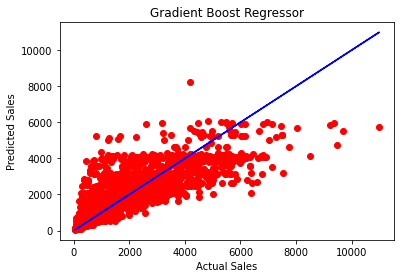

In [138]:
plt.scatter(x=ytest,y=p,color='r')
plt.plot(ytest,ytest,color='b')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Gradient Boost Regressor')

There are still a lot of outliers in our output

## Saving the model

In [139]:
import joblib
joblib.dump(model,'Mart_Sales.obj')

['Mart_Sales.obj']

## Predicting the test dataset

In [140]:
predictions=model.predict(test)

In [141]:
predictions

array([1610.57949336, 1386.58534402,  538.13101743, ..., 1903.87738941,
       3619.21757545, 1421.97323576])

#### Saving the predictions

In [142]:
predictions=pd.DataFrame(predictions)

In [143]:
predictions.to_csv('test_predictions.csv')